# Heart attack analysis and prediction

### Dataset description

- age: Age of the patient.
- sex: Sex of the patient (1 = male, 0 = female).
- cp: Chest pain type (0-3, indicating different types of chest pain).
- trtbps: Resting blood pressure (in mm Hg).
- chol: Cholesterol in mg/dl.
- fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
- restecg: Resting electrocardiographic results (0-2).
- thalachh: Maximum heart rate achieved.
- exng: Exercise-induced angina (1 = yes, 0 = no).
- oldpeak: ST depression induced by exercise relative to rest.
- slp: Slope of the peak exercise ST segment (0-2).
- caa: Number of major vessels (0-3) colored by fluoroscopy.
- thall: Thalassemia (1-3, representing different states of thalassemia).
- output: Diagnosis of heart disease (1 = presence, 0 = absence).

### Data exploration

In [131]:
import pandas as pd

In [132]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [133]:
heart.groupby('output').describe()

age                                                       sex  \
        count       mean       std   min   25%   50%   75%   max  count   
output                                                                    
0       138.0  56.601449  7.962082  35.0  52.0  58.0  62.0  77.0  138.0   
1       165.0  52.496970  9.550651  29.0  44.0  52.0  59.0  76.0  165.0   

                  ...  caa       thall                                     \
            mean  ...  75%  max  count      mean       std  min  25%  50%   
output            ...                                                       
0       0.826087  ...  2.0  4.0  138.0  2.543478  0.684762  0.0  2.0  3.0   
1       0.563636  ...  0.0  4.0  165.0  2.121212  0.465752  0.0  2.0  2.0   

                  
        75%  max  
output            
0       3.0  3.0  
1       2.0  3.0  

[2 rows x 104 columns]

In [134]:
heart.drop_duplicates(inplace=True, keep='first')

In [135]:
heart.shape

(302, 14)

In [136]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### Data visualization

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

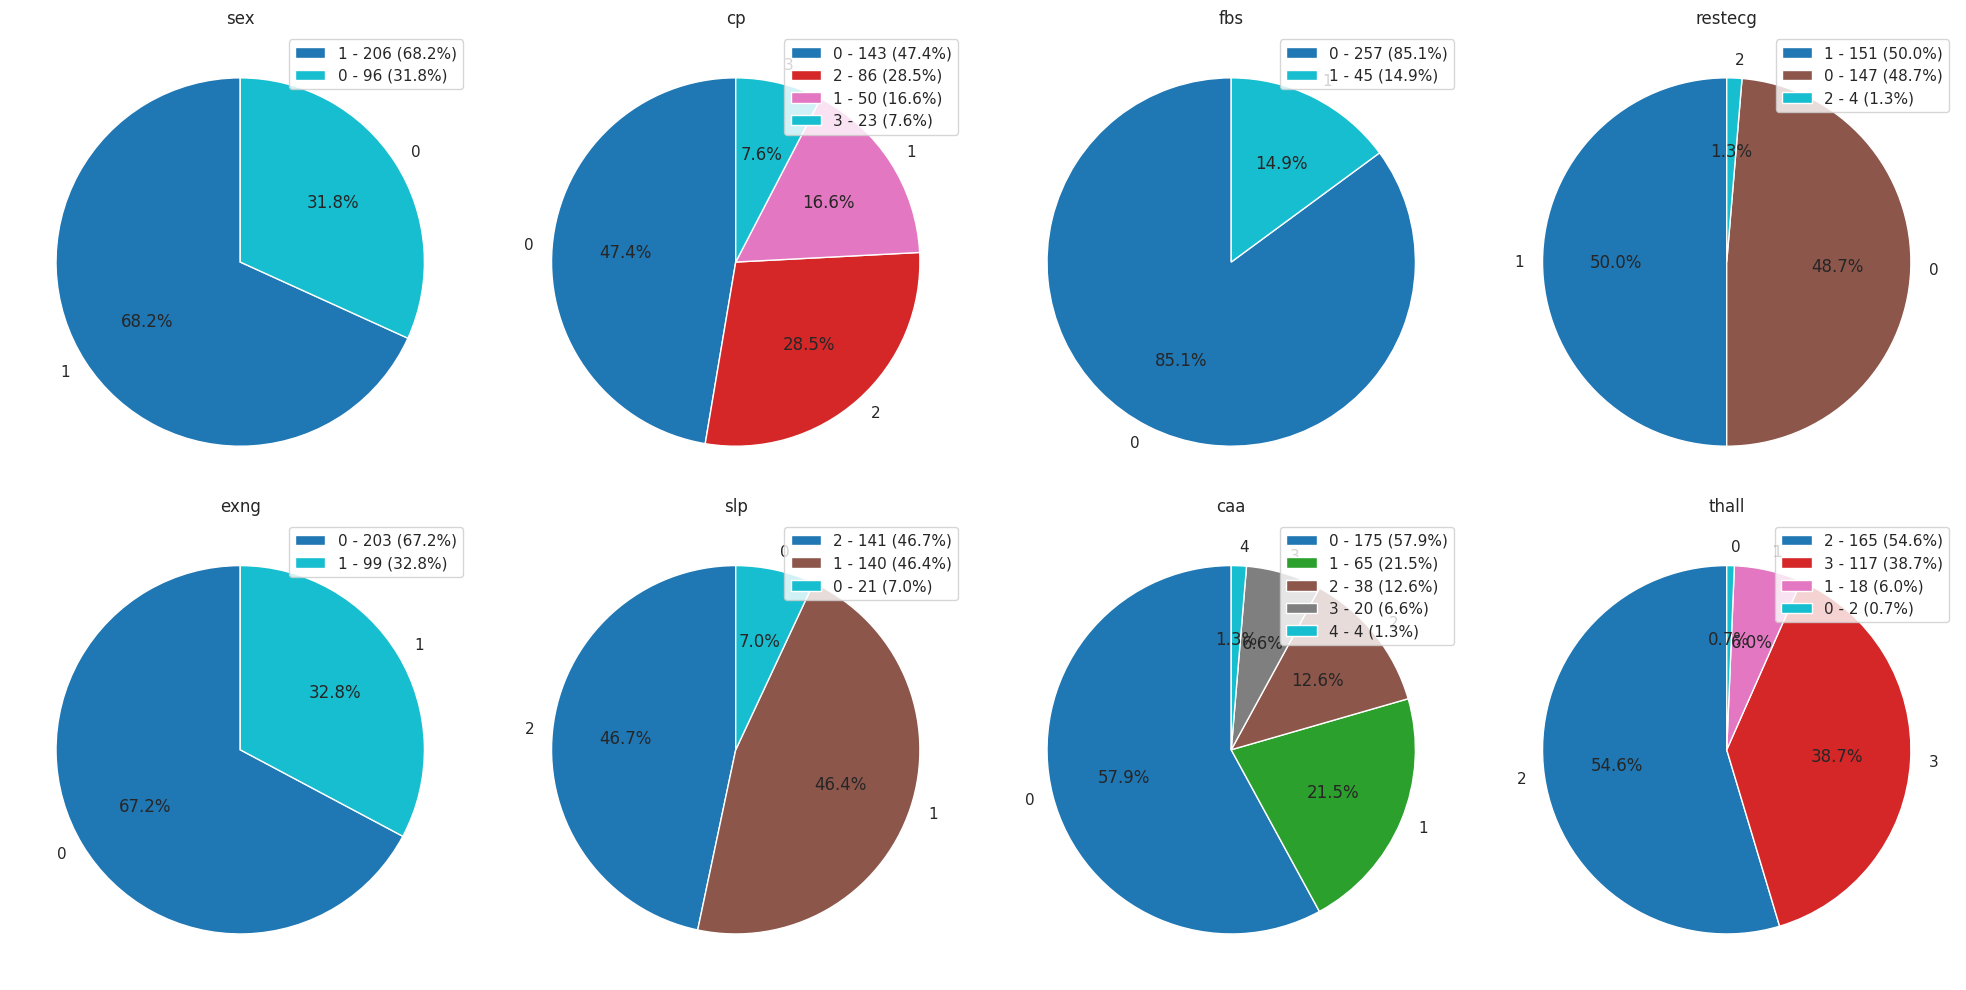

In [138]:
cmap = plt.get_cmap("tab10")

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
ax = ax.flatten()

cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

for i in range(len(ax)):
    values = heart[cat_features[i]].value_counts()
    
    colors = cmap(np.linspace(0, 1, len(values)))
    
    wedges, texts, autotexts = ax[i].pie(values, labels=values.index,
                                         autopct='%1.1f%%', startangle=90, colors=colors)

    ax[i].set_title(cat_features[i])
    
    ax[i].legend(wedges, [f'{label} - {val} ({pct})' for label, val, pct in zip(values.index, values, [f'{pct:.1f}%' for pct in (values / values.sum() * 100)])], loc='upper right')

plt.tight_layout()


1. **Sex**: There are more male patients than female patients.

2. **Chest Pain Type (cp)**: The most common is type 1 (typical angina), followed by type 2 (atypical angina). Types 3 (non-anginal pain) and 4 (asymptomatic) are less frequent.

3. **Fasting Blood Sugar (fbs)**: Most patients have fasting blood sugar ≤ 120 mg/dl (fbs = 0). Fewer have levels > 120 mg/dl (fbs = 1).

4. **Resting Electrocardiographic Results (rest_ecg)**: Results are split between normal (0) and ST-T wave abnormalities (1). Few show left ventricular hypertrophy (2).

5. **Exercise-Induced Angina (exang)**: Most patients do not have exercise-induced angina (exang = 0), while some do (exang = 1).

6. **Slope of the Peak Exercise ST Segment (slp)**: Types 2 and 1 are majority.

7. **Number of Major Vessels (ca)**: Most patients have no major vessels colored (ca = 0). The number of patients decreases as the count of vessels increases (ca = 1, 2, or 3).

8. **Thalassemia (thall)**: Thalassemia type 2 is most common, followed by type 3. Types 1 and 0 are rare.

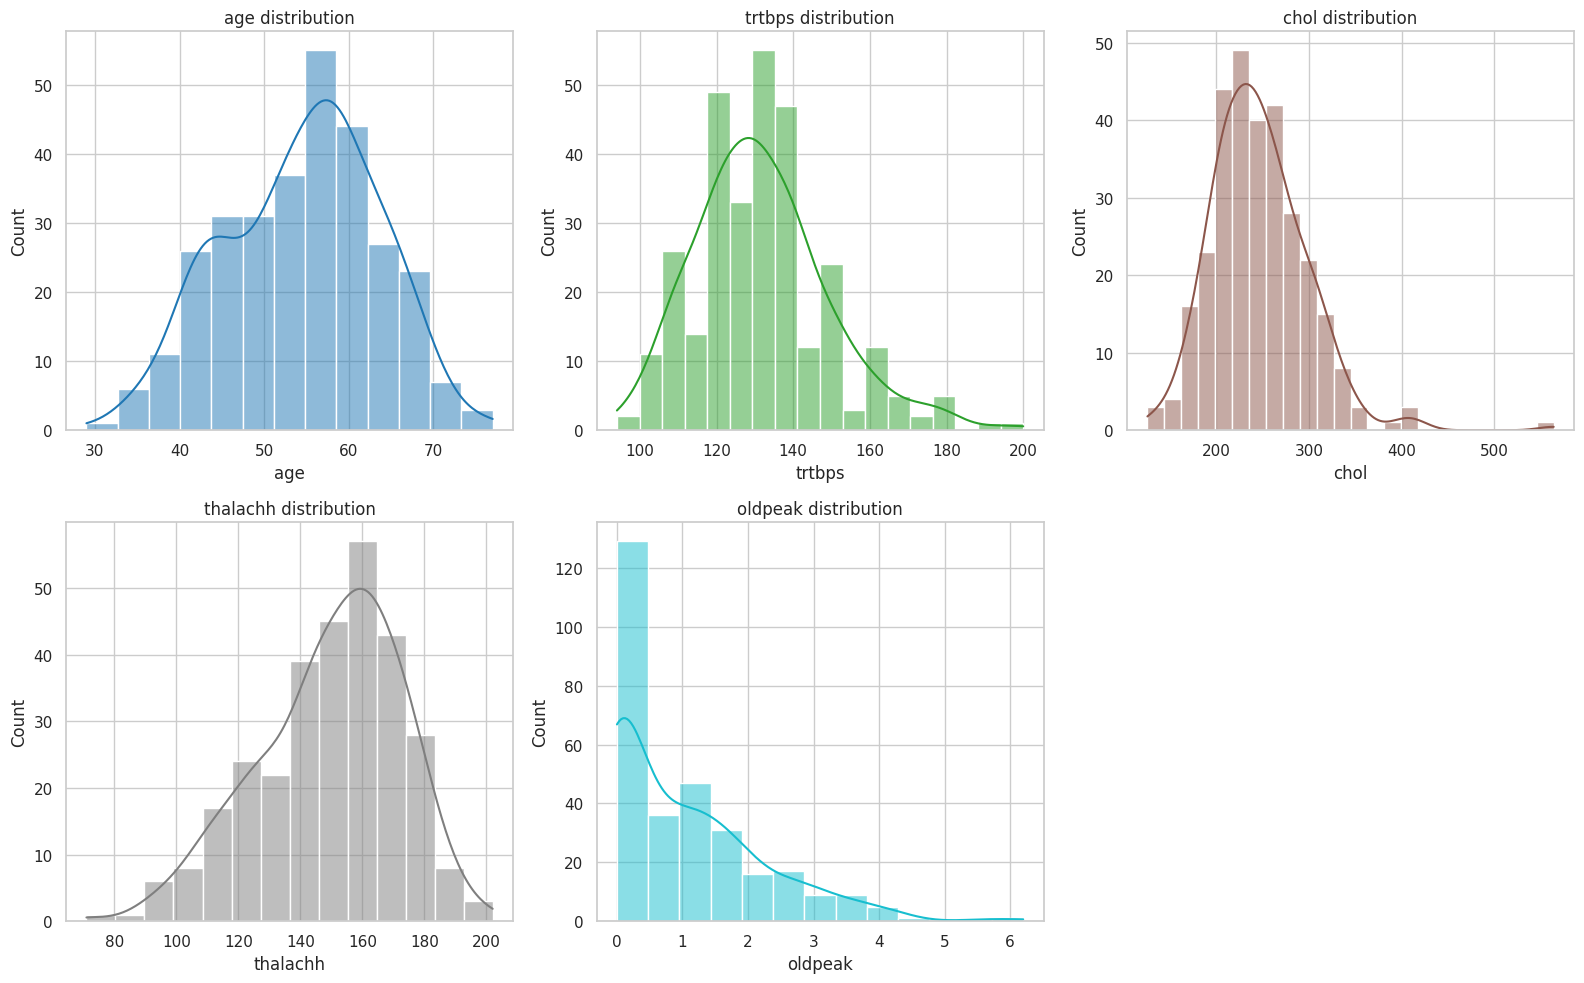

In [139]:
num_features = [feat for feat in heart.columns if not feat in cat_features and feat != 'output']

colors = cmap(np.linspace(0, 1, len(num_features)))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
ax = ax.flatten()

for i in range(len(num_features)):
    sns.histplot(x=heart[num_features[i]], ax=ax[i], kde=True   , color=colors[i])
    ax[i].set_title(f'{num_features[i]} distribution')

ax[5].remove()
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()

### Prediction

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [141]:
cat_features.remove('cp')
ord_features = ['cp']

# Set target and features
y = heart['output']
X = heart[cat_features + num_features + ord_features]

In [142]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features),
        ('ord', OrdinalEncoder(), ord_features)
    ])

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [170]:
for i in range(1, 26):
    knn = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('knn', KNeighborsClassifier(n_neighbors=i))
        ]
    )
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    print(f'Accuracy with {i} neighbors: {accuracy_score(y_test, y_pred):0.4f}')

Accuracy with 1 neighbors: 0.8197
Accuracy with 2 neighbors: 0.8525
Accuracy with 3 neighbors: 0.8361
Accuracy with 4 neighbors: 0.8361
Accuracy with 5 neighbors: 0.8525
Accuracy with 6 neighbors: 0.8525
Accuracy with 7 neighbors: 0.8525
Accuracy with 8 neighbors: 0.8361
Accuracy with 9 neighbors: 0.8525
Accuracy with 10 neighbors: 0.8689
Accuracy with 11 neighbors: 0.8361
Accuracy with 12 neighbors: 0.8197
Accuracy with 13 neighbors: 0.8361
Accuracy with 14 neighbors: 0.8197
Accuracy with 15 neighbors: 0.8197
Accuracy with 16 neighbors: 0.8525
Accuracy with 17 neighbors: 0.8361
Accuracy with 18 neighbors: 0.8197
Accuracy with 19 neighbors: 0.7869
Accuracy with 20 neighbors: 0.8033
Accuracy with 21 neighbors: 0.8033
Accuracy with 22 neighbors: 0.8197
Accuracy with 23 neighbors: 0.8033
Accuracy with 24 neighbors: 0.8361
Accuracy with 25 neighbors: 0.8361
